In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

In [8]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(f'Training images shape: {train_images.shape}')
print(f'Training labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [3]:
model = Sequential()


batch_size = 64
epochs=100
activation='relu' # 'tanh', 'sigmoid', 'relu'
dropout = 0.3
# optimizer = SGD(learning_rate=0.01, momentum=0.9)
# optimizer = RMSprop(learning_rate=0.001)
optimizer = Adam(learning_rate=0.0001)


model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(512, activation=activation, kernel_regularizer=l2(0.001)))
model.add(Dropout(dropout))

model.add(Dense(256, activation=activation, kernel_regularizer=l2(0.001)))
model.add(Dropout(dropout))

model.add(Dense(128, activation=activation, kernel_regularizer=l2(0.001)))
model.add(Dropout(dropout))

model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# model.summary()

/Users/som/Library/Caches/pypoetry/virtualenvs/python-ds-mn4lpF3A-py3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5378 - loss: 2.3900 - val_accuracy: 0.8156 - val_loss: 1.4153
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7914 - loss: 1.4624 - val_accuracy: 0.8389 - val_loss: 1.2235
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8292 - loss: 1.2470 - val_accuracy: 0.8503 - val_loss: 1.0949
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8409 - loss: 1.1181 - val_accuracy: 0.8561 - val_loss: 1.0053
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8516 - loss: 1.0122 - val_accuracy: 0.8659 - val_loss: 0.9089
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8593 - loss: 0.9243 - val_accuracy: 0.8668 - val_loss: 0.8469
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8629 - loss: 0.8662 - val_accuracy: 0.8690 - val_loss: 0.7919
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8661 - loss: 0.8038 - val_accu

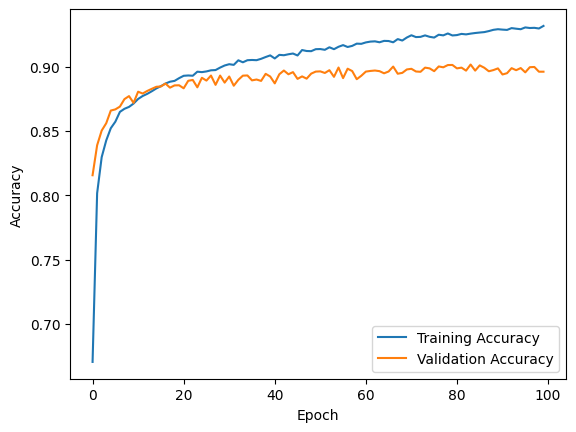

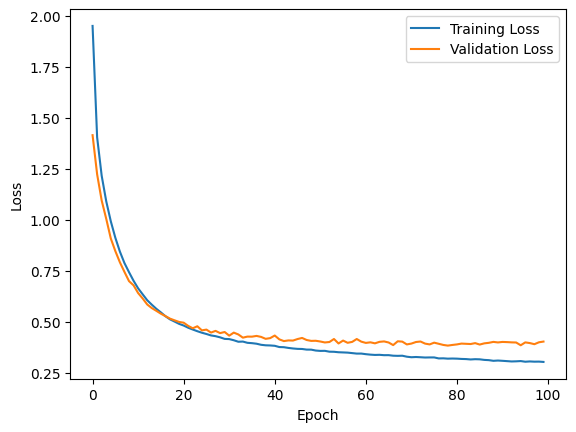

In [7]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.8905 - loss: 0.4289
